In [37]:
# Importing Packages

import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

In [38]:
# Reading the dataset
data_tests = pd.read_csv('Country-wise_data_testing_information/India_data.csv')
data_policy = pd.read_csv('Cases_and_policies_Country_wise/India_Covid_Policies.csv')

In [42]:
# Converting the datatype of dates to datetime
dates = pd.to_datetime(data_policy['dateRep'], format = '%d/%m/%Y')
# Adding dates to the dataframe
data_policy['Date'] = dates

# Reading the dataset
#data = pd.read_csv('Country-wise_data_testing_information/India_data.csv')

# Converting the datatype of dates to datetime
dates = pd.to_datetime(data_tests['dateRep'], format = '%d-%m-%Y')

# Adding dates to the dataframe
data_tests['Date'] = dates

# Removing the original object datatype
# data = data.drop(labels = ['day'], axis = 1)

In [43]:
# Dataset Preprocessing before running the model
def dataset_preprocess_policy(df):
    
    # Setting date as the index of the dataframe
    df = df.set_index('Date')
    
    #Creating different columns with regressor variables
#     ds = df.index.to_series()
#     df['Day'] = ds.dt.day
#     df['Month'] = ds.dt.month
#     df['Weekday'] = ds.dt.dayofweek
#     df['Year'] = ds.dt.year
    
    # Dropping the text columns which have same entries at each row
    #df = df.drop(['Country', 'day', 'Country Name', 'Region','Unnamed: 0', ], axis = 1)
    df = df.drop(['countriesAndTerritories', 'geoId', 'dateRep', 'countryterritoryCode','Unnamed: 0', 'day', 'month','year','popData2018'], axis = 1)
    df = df.drop(df.index[len(df)-1])
    
    #return the dataframe
    return(df)

In [44]:
# Dataset Preprocessing before running the model
def dataset_preprocess_tests(df):
    
    # Setting date as the index of the dataframe
    df = df.set_index('Date')
    
    #Creating different columns with regressor variables
#     ds = df.index.to_series()
#     df['Day'] = ds.dt.day
#     df['Month'] = ds.dt.month
#     df['Weekday'] = ds.dt.dayofweek
#     df['Year'] = ds.dt.year
    
    # Dropping the text columns which have same entries at each row
    #df = df.drop(['Country', 'day', 'Country Name', 'Region'], axis = 1)
    df = df.drop(['countriesAndTerritories', 'geoId', 'dateRep', 'countryterritoryCode', 'cases', 'deaths'], axis = 1)
    df = df.drop(df.index[len(df)-1])
    
    #return the dataframe
    return(df)

In [45]:
data_policy = dataset_preprocess_policy(data_policy)
data_tests = dataset_preprocess_tests(data_tests)

In [46]:
data_policy.head()

,cases,deaths,Lockdown,Public Health Measures,Governance and socio-economic measures,Humanitarian exemption,Social distancing,Movement restrictions
Date,,,,,,,,
2019-12-31,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
data_tests.head()

,day,month,year,popData2018,Daily_total_tests,Daily_tests_per_thousand,tests_per_thousand
Date,,,,,,,
2019-12-31,31,12,2019,1352617328,0.0,0.0,0.0
2020-01-01,1,1,2020,1352617328,0.0,0.0,0.0
2020-01-02,2,1,2020,1352617328,0.0,0.0,0.0
2020-01-03,3,1,2020,1352617328,0.0,0.0,0.0
2020-01-04,4,1,2020,1352617328,0.0,0.0,0.0


In [48]:
merge=pd.merge(data_tests,data_policy, how='inner', left_index=True, right_index=True)

In [49]:
merge.head()

,day,month,year,popData2018,Daily_total_tests,Daily_tests_per_thousand,tests_per_thousand,cases,deaths,Lockdown,Public Health Measures,Governance and socio-economic measures,Humanitarian exemption,Social distancing,Movement restrictions
Date,,,,,,,,,,,,,,,
2019-12-31,31,12,2019,1352617328,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01,1,1,2020,1352617328,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,2,1,2020,1352617328,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,3,1,2020,1352617328,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,4,1,2020,1352617328,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2019-12-31 to 2020-04-09
Data columns (total 15 columns):
day                                       100 non-null int64
month                                     100 non-null int64
year                                      100 non-null int64
popData2018                               100 non-null int64
Daily_total_tests                         100 non-null float64
Daily_tests_per_thousand                  100 non-null float64
tests_per_thousand                        100 non-null float64
cases                                     100 non-null int64
deaths                                    100 non-null int64
Lockdown                                  100 non-null float64
Public Health Measures                    100 non-null float64
Governance and socio-economic measures    100 non-null float64
Humanitarian exemption                    100 non-null float64
Social distancing                         100 non-null float64
Moveme

In [11]:
data = data_policy.join(data_tests)

In [12]:
data.head(100)

,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed,Lockdown,Public Health Measures,Governance and socio-economic measures,Humanitarian exemption,Social distancing,Movement restrictions,...,Mr,day,month,year,cases,deaths,popData2018,Daily_total_tests,Daily_tests_per_thousand,tests_per_thousand
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0,0,1,1,0,2,0,0,0,0,...,0.0,31.0,1.0,2020.0,0.0,0.0,1.352617e+09,0.0,0.000000,0.000000
2020-02-01,0,0,0,1,0,4,0,0,0,0,...,0.0,1.0,2.0,2020.0,0.0,0.0,1.352617e+09,0.0,0.000000,0.000000
2020-02-02,0,0,0,1,0,6,0,0,0,0,...,0.0,2.0,2.0,2020.0,1.0,0.0,1.352617e+09,1.0,0.000000,0.000000
2020-02-03,0,0,2,3,0,8,0,0,0,0,...,0.0,3.0,2.0,2020.0,0.0,0.0,1.352617e+09,0.0,0.000000,0.000000
2020-02-04,0,0,0,3,0,10,0,0,0,0,...,0.0,4.0,2.0,2020.0,1.0,0.0,1.352617e+09,1.0,0.000000,0.000000
2020-02-05,0,0,0,3,0,12,0,0,0,0,...,0.0,5.0,2.0,2020.0,0.0,0.0,1.352617e+09,0.0,0.000000,0.000000
2020-02-06,0,0,0,3,0,14,0,0,0,0,...,0.0,6.0,2.0,2020.0,0.0,0.0,1.352617e+09,0.0,0.000000,0.000000
2020-02-07,0,0,0,3,0,16,0,0,0,0,...,0.0,7.0,2.0,2020.0,0.0,0.0,1.352617e+09,0.0,0.000000,0.000000
2020-02-08,0,0,0,3,0,18,0,0,0,0,...,0.0,8.0,2.0,2020.0,0.0,0.0,1.352617e+09,0.0,0.000000,0.000000


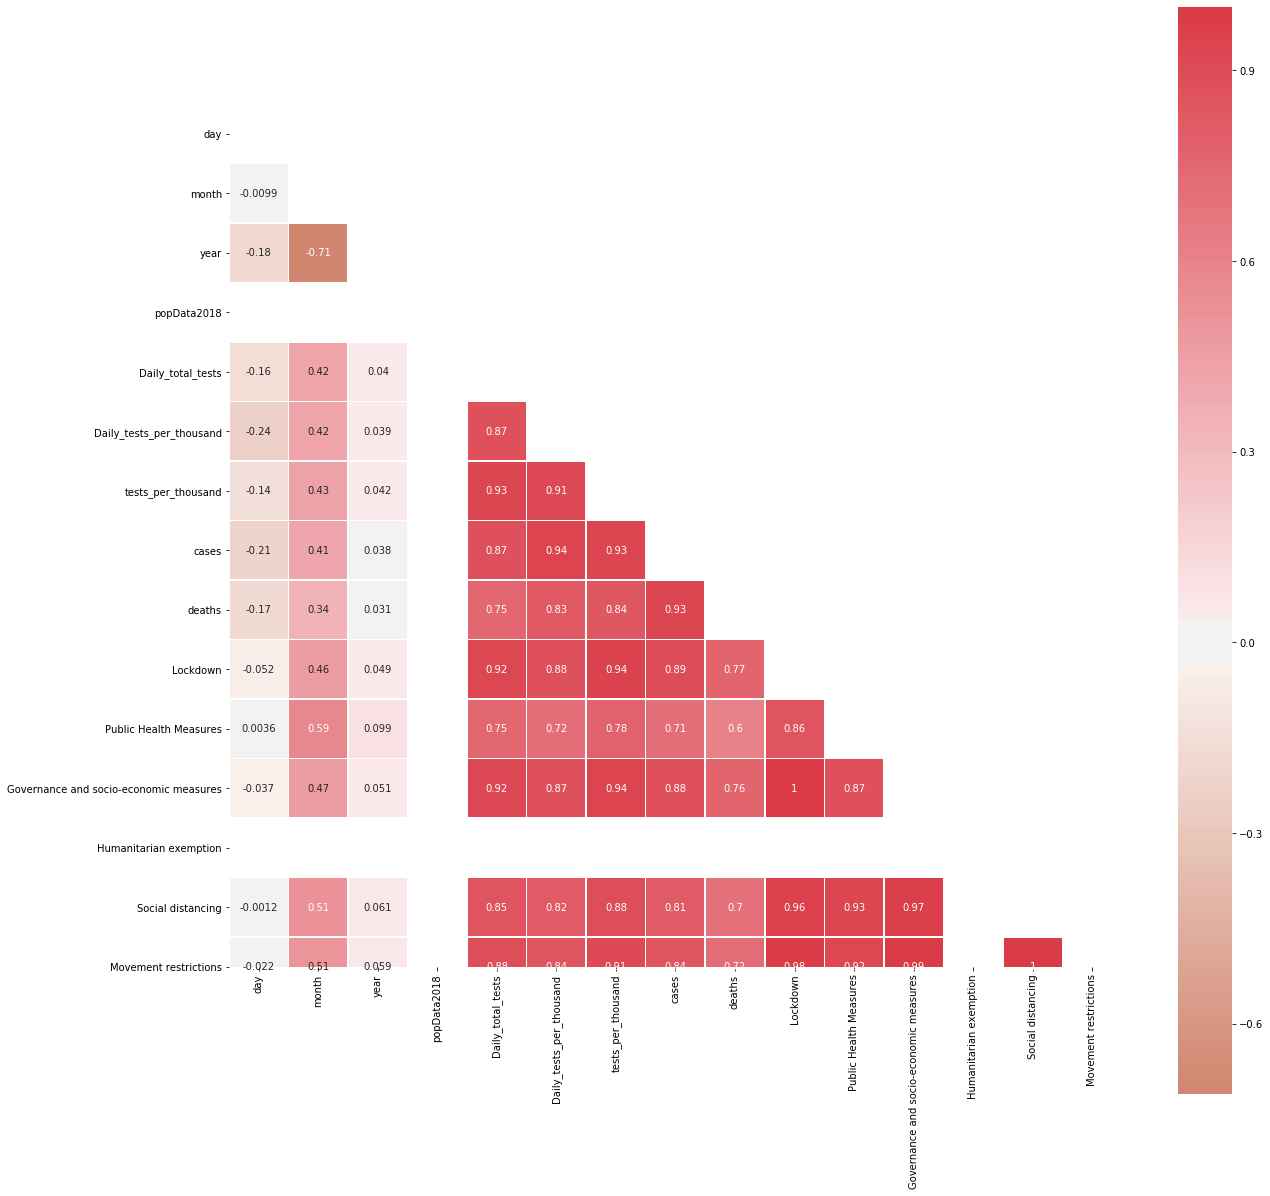

In [51]:
# Compute the correlation matrix
corr = merge.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 40))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(22, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})